In [1]:
# Do this one of the following ways!
from PhotochemPy import PhotochemPy # If installed with pip use this!

# If compiled in root directory with compile.sh, uncomment this
# (and comment out the other import command)
# import sys
# sys.path.append("..")
# from PhotochemPy import PhotochemPy

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
pc = PhotochemPy('../input/templates/Hadean+HCN/species.dat', \
                 '../input/templates/Hadean+HCN/reactions.rx', \
                 '../input/templates/Hadean+HCN/planet.dat', \
                 '../input/templates/Hadean+HCN/input_photchem.dat', \
                 '../input/templates/Hadean+HCN/atmosphere.txt', \
                 '../input/templates/Hadean+HCN/Sun_4.0Ga.txt')

In [4]:
converged = pc.integrate()

In [5]:
# This makes the output of the past integration, input for the next integration.
# It makes the program run a lot faster.
pc.out2in()     

In this atmosphere it looks like H2CO forms primarily from the photolysis products of methane (reactions like CH21 + CO2 -> H2CO + CO, where the CH21 comes from CH4 photolysis). Below, you can see where methane photolysis occurs (>~60km). H2CO is clearly being made at the same altitude.

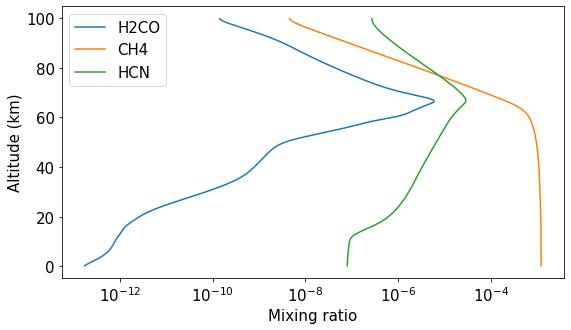

In [7]:
out = pc.out_dict()
plt.rcParams.update({'font.size': 15})
fig,ax = plt.subplots(1,1,figsize=[9,5])

species = ['H2CO','CH4','HCN']

for sp in species:
    ax.plot(out[sp],out['alt'],label = sp)

ax.set_xscale('log')
ax.legend()

ax.set_ylabel('Altitude (km)')
ax.set_xlabel('Mixing ratio')

plt.show()


Lets take a closer look a the boundary conditions of H2CO. For all the boundary conditions, see the file `species.dat`.

In [22]:
ind = pc.ispec.index('H2CO') # index of H2CO
print('lbound (lower boundary condition) =',pc.photo.lbound[ind])
print('Deposition velocity =',pc.photo.vdep[ind])

Lbound (lower boundary condition) = 0
Deposition velocity = 0.2


The lower boundary condition (called `lbound`) is "0", which means it is a constant deposition velocity. The deposition velocity is 0.2 cm/s. The deposition velocity is related to the flux into the Ocean in the follwing way:

$$\Phi_{H2CO}=v_{dep}n_{H2CO}$$

What should the deposition velocity be? Why 0.2 cm/s? I don't know why its set at 0.2 cm/s. It should be based on a model for H2CO destruction in the ocean. H2CO probably gets destroyed at some rate in the ocean, this will be equivalent to a specific depositino velocity ($v_{dep}$).

In [30]:
ind = pc.ispec.index('H2CO') # index of H2CO
nH2CO = pc.out_dict()['H2CO'][0]*pc.out_dict()['den'][0] # ground level number density of H2CO
vdep = pc.photo.vdep[ind]
flux = nH2CO*vdep

print('Flux of H2CO into the ocean =','%.2e'%flux,'molecules/cm2/s')

# surface fluxes can also be accessed using this command
print('%.2e'%pc.surf_flux()['H2CO'])

Flux of H2CO into the ocean = 8.88e+05 molecules/cm2/s
-8.88e+05


We can also explore H2CO formation in a CH4 poor atmosphere

In [31]:
# sets lower boundary condition of CH4 to constent deposition velocity
# with a deposition velocity of zero. This makes it so CH4 doesn't flow
# over ther lower boundary. All CH4 will be the balance of photochemically
# generated and destroyed CH4.
pc.set_lbound('CH4',0) 

ind = pc.ispec.index('CH4')
pc.photo.vdep[ind]  = 0.0

In [32]:
pc.integrate(nsteps=5000) 
# nsteps = number of steps integrator takes to try to find photochemical
# equilibrium. Taking all the CH4out of the atomsphere is a "big" change
# to the atmosphere that needs many timesteps to work out.

True

Flux of H2CO into the ocean = -7.13e+09 molecules/cm2/s
Surface mixing ratio of H2CO = 1.39e-09
Surface pressure = 0.9827960049251678 bar


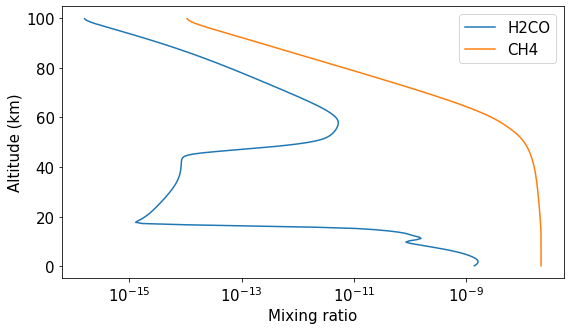

In [38]:
# print the surface flux
print('Flux of H2CO into the ocean =','%.2e'%pc.surf_flux()['H2CO'],'molecules/cm2/s')
# print surface mixing ratio
print('Surface mixing ratio of H2CO =','%.2e'%pc.out_dict()['H2CO'][0])
# print surface pressure
print('Surface pressure =',pc.out_dict()['press'][0],'bar')

out1 = pc.out_dict()
plt.rcParams.update({'font.size': 15})
fig,ax = plt.subplots(1,1,figsize=[9,5])

species = ['H2CO','CH4']

for sp in species:
    ax.plot(out1[sp],out1['alt'],label = sp)

ax.set_xscale('log')
ax.legend()

ax.set_ylabel('Altitude (km)')
ax.set_xlabel('Mixing ratio')

plt.show()

Looks like a lot more H2CO is being made lower the the ground, and very little is made up high in the atmosphere. Might be from HCO + HCO -> H2CO + CO? Not totally sure. HCO is from CO and H. H comes from H2O photolysis, and CO from CO2 photolysis.